In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/ryanashcraft/opt/anaconda3/lib/python3.7/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
import numpy as np

In [2]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

# Read the CSV and Perform Basic Data Cleaning

In [3]:
cdf = pd.read_csv('mach_learn_df.csv')

cdf = cdf.drop(columns=['Unnamed: 0','City'])

cdf.head()

,Hour,Offense_Type,Premise,Tract,Month,Day_of_Week,Temperature,Weather
0,0,Burglary/Robbery,Residence or House,313100,1,Monday,46.56,Clouds
1,0,Burglary/Robbery,Apartment,321300,1,Monday,46.56,Clouds
2,0,Burglary/Robbery,"Road, Street, or Sidewalk",432801,1,Monday,46.56,Clouds
3,0,Assault,"Road, Street, or Sidewalk",330700,1,Monday,46.56,Clouds
4,0,Theft,"Church, Synagogue, or Temple Parking Lot",312800,1,Monday,46.56,Clouds


# Select your features (columns)

In [4]:
# Assign X (data) and y (target)
X = cdf.drop(["Offense_Type"], axis=1)
y = cdf["Offense_Type"]
print(X.shape, y.shape)

(309959, 7) (309959,)


In [5]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encodery = LabelEncoder()
encoded_y = label_encodery.fit(y)
transformed_y = label_encodery.transform(y)

transformed_y

array([2, 2, 2, ..., 7, 3, 7])

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
encoded_X = MultiColumnLabelEncoder(columns = ['Day_of_Week', 'Premise', 'Tract', 'Weather']).fit_transform(X)

encoded_X

,Hour,Premise,Tract,Month,Day_of_Week,Temperature,Weather
0,0,125,156,1,1,46.56,1
1,0,9,180,1,1,46.56,1
2,0,131,385,1,1,46.56,1
3,0,131,204,1,1,46.56,1
4,0,33,153,1,1,46.56,1
...,...,...,...,...,...,...,...
309954,23,126,491,5,3,74.26,6
309955,23,126,486,5,3,74.26,6
309956,23,18,486,5,3,74.26,6
309957,23,126,361,5,3,74.26,6


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_X, transformed_y, random_state=1, stratify=y)

In [8]:
y_test

array([7, 7, 1, ..., 3, 1, 2])

In [9]:
X_train.head()

,Hour,Premise,Tract,Month,Day_of_Week,Temperature,Weather
103959,22,140,275,12,4,72.07,1
277814,17,126,317,3,5,77.31,1
252929,17,76,228,12,1,56.98,0
292483,14,126,400,4,1,53.78,0
41013,16,115,399,6,6,86.13,4


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [11]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



k: 20, Train/Test Score: 0.510/0.462
k: 24, Train/Test Score: 0.505/0.464
k: 28, Train/Test Score: 0.501/0.466
k: 32, Train/Test Score: 0.498/0.469
k: 36, Train/Test Score: 0.495/0.469
k: 40, Train/Test Score: 0.493/0.470
k: 44, Train/Test Score: 0.492/0.470
k: 48, Train/Test Score: 0.490/0.470
k: 52, Train/Test Score: 0.489/0.471
k: 56, Train/Test Score: 0.488/0.471


ValueError: x and y must have same first dimension, but have shapes (13,) and (10,)

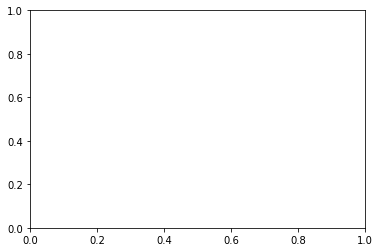

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(20, 60, 4):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

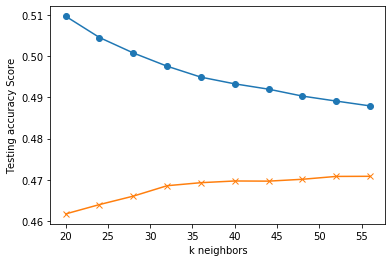

In [13]:
plt.plot(range(20, 60, 4), train_scores, marker='o')
plt.plot(range(20, 60, 4), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Make Predictions

In [14]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=50)
knn = knn.fit(X_train, y_train)
print('k=50 Test Acc: %.3f' % knn.score(X_test, y_test))

k=50 Test Acc: 0.471


In [19]:
encoded_predictions = knn.predict(X_test)
prediction_labels = label_encodery.inverse_transform(encoded_predictions[:5])
actual_labels = label_encodery.inverse_transform(y_test[:5])

In [24]:
actual_vs_predicts = zip(actual_labels, prediction_labels)

for actual, predict in actual_vs_predicts:
    print(f'Actual: {actual} - Prediction: {predict}')
    if actual == predict:
        print('Correct!')
    else:
        print('Boo :(')

Actual: Theft - Prediction: Theft
Correct!
Actual: Theft - Prediction: Theft
Correct!
Actual: Assault - Prediction: Theft
Boo :(
Actual: Intimidation - Prediction: Theft
Boo :(
Actual: Assault - Prediction: Assault
Correct!
Actual: Theft - Prediction: Theft
Correct!
Actual: Vandalism - Prediction: Theft
Boo :(
Actual: Theft - Prediction: Theft
Correct!
Actual: Theft - Prediction: Theft
Correct!
Actual: Theft - Prediction: Theft
Correct!
Actual: Theft - Prediction: Theft
Correct!
Actual: Theft - Prediction: Theft
Correct!
Actual: Assault - Prediction: Assault
Correct!
Actual: Theft - Prediction: Theft
Correct!
Actual: Vandalism - Prediction: Assault
Boo :(
Actual: Assault - Prediction: Assault
Correct!
Actual: Theft - Prediction: Theft
Correct!
Actual: Burglary/Robbery - Prediction: Assault
Boo :(
Actual: Burglary/Robbery - Prediction: Theft
Boo :(
Actual: Burglary/Robbery - Prediction: Assault
Boo :(
Actual: Theft - Prediction: Theft
Correct!
Actual: Theft - Prediction: Theft
Correct!


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

# Save the Model

In [40]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'crime_KNN.sav'
joblib.dump(knn, filename)

['crime_KNN.sav']

In [41]:
knn_predict = joblib.load('crime_KNN.sav')

In [48]:
proba_array = knn_predict.predict_proba(X_test[4:5]) # user input within ()
proba_array

array([[0.04, 0.46, 0.12, 0.06, 0.  , 0.  , 0.  , 0.16, 0.16]])

In [35]:
# Check Array of Probabilities and Convert to Percentages
probs = (proba_array[0])

array([0.04, 0.46, 0.12, 0.06, 0.  , 0.  , 0.  , 0.16, 0.16])

In [ ]:
# Decode Classes
classes = label_encodery.inverse_transform(knn.classes_)
print(classes)

In [36]:
# Create Summary

# for proba in proba_array: - if multiple lines of arrays
class_probs = zip(classes, proba_array[0])

for offense, prob in class_probs:
    print(f'Crime: {offense} - Probability: {prob}')

Crime: Arson - Probability: 0.04
Crime: Assault - Probability: 0.46
Crime: Burglary/Robbery - Probability: 0.12
Crime: Intimidation - Probability: 0.06
Crime: Kidnapping - Probability: 0.0
Crime: Murder/Manslaughter - Probability: 0.0
Crime: Sex Crime - Probability: 0.0
Crime: Theft - Probability: 0.16
Crime: Vandalism - Probability: 0.16


In [37]:
X_test[:1]

,Hour,Premise,Tract,Month,Day_of_Week,Temperature,Weather
14157,17,52,337,3,6,57.61,0


In [57]:
knn_predict.predict([[10, 60, 344, 4, 2, 60, 1]])

array([7])